# **Importing libraries**

In [5]:
pip install plotly

  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

In [4]:
pip install pydicom

  Using cached pydicom-2.2.2-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opencv-python

In [8]:
pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import torch
import torch.utils.data
from PIL import Image
import pandas as pd
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from sklearn.model_selection import train_test_split
from torchvision.models.detection.rpn import AnchorGenerator
from torch.utils.data.sampler import SequentialSampler
from pydicom import dcmread

import torch
from torchvision import transforms
from torchvision import transforms as T
import torch.nn as nn
import torchvision
from torch.utils import data
from torch.utils.data import Dataset, DataLoader

#import plotly.express as px
#import plotly.graph_objects as go

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pydicom as pyd
from tqdm import tqdm

#import cv2
import re
import time
import matplotlib
import os



C:\Users\vikra\anaconda3\envs\new\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

from pydicom import dcmread


In [4]:
#pip install pydicom

# **Loading data**

In [5]:
labels= pd.read_csv(r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\stage_2_train_labelsd\stage_2_train_labels.csv')
detailed_class=pd.read_csv(r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\stage_2_detailed_class\stage_2_detailed_class_info.csv')

In [6]:
labels

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


In [7]:
detailed_class

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity


In [8]:
train_path= r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\stage_2_train'
test_path=r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\stage_2_test'

# **EDA**

In [9]:
detailed_class['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

<AxesSubplot:ylabel='class'>

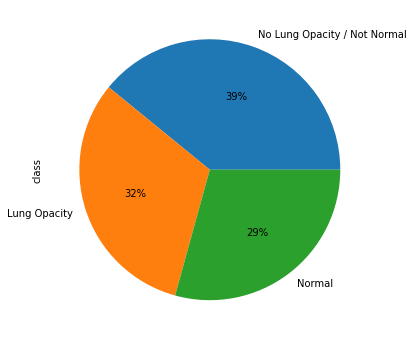

In [10]:
detailed_class['class'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['No Lung Opacity / Not Normal', 'Lung Opacity','Normal'], figsize = (10, 6))

Among all the class No Lung Opacity / Not Normal are highest. Classes are not imbalanced.

In [11]:
len(np.unique(labels['patientId']))

26684

In [12]:
labels.shape

(30227, 6)

As unique IDs are less than the no. of rows there are some duplicate values.

In [13]:
#Removing duplicate values
unique_patientId = labels.drop_duplicates(subset = ['patientId'])
unique_patientId

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...
30219,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,666.0,418.0,186.0,223.0,1
30221,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,609.0,464.0,240.0,284.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0


<AxesSubplot:ylabel='Target'>

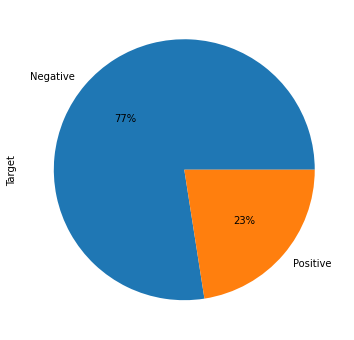

In [14]:
unique_patientId['Target'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Negative', 'Positive'], figsize = (10, 6))

In [15]:
target =unique_patientId['Target'].value_counts().to_frame().reset_index().rename(columns={'index':'Target', 'Target':'Count'}).replace([0,1], ['Normal', 'diseased']).groupby('Target').sum().reset_index()
target

,Target,Count
0,Normal,20672
1,diseased,6012


Diseased patients

In [16]:
labels_pos=labels[labels['Target']==1]

In [17]:
del labels_pos['Target']

In [18]:
labels_pos.values

array([['00436515-870c-4b36-a041-de91049b9ab4', 264.0, 152.0, 213.0,
        379.0],
       ['00436515-870c-4b36-a041-de91049b9ab4', 562.0, 152.0, 256.0,
        453.0],
       ['00704310-78a8-4b38-8475-49f4573b2dbb', 323.0, 577.0, 160.0,
        104.0],
       ...,
       ['c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8', 185.0, 298.0, 228.0,
        379.0],
       ['c1f7889a-9ea9-4acb-b64c-b737c929599a', 570.0, 393.0, 261.0,
        345.0],
       ['c1f7889a-9ea9-4acb-b64c-b737c929599a', 233.0, 424.0, 201.0,
        356.0]], dtype=object)

In [19]:
train_paths = [os.path.join(train_path, a[0]) for a in labels_pos.values]

In [47]:
train_paths

['C:\\Users\\vikra\\OneDrive\\Documents\\AI Notes\\capstone\\stage_2_train\\00436515-870c-4b36-a041-de91049b9ab4',
 'C:\\Users\\vikra\\OneDrive\\Documents\\AI Notes\\capstone\\stage_2_train\\00436515-870c-4b36-a041-de91049b9ab4',
 'C:\\Users\\vikra\\OneDrive\\Documents\\AI Notes\\capstone\\stage_2_train\\00704310-78a8-4b38-8475-49f4573b2dbb',
 'C:\\Users\\vikra\\OneDrive\\Documents\\AI Notes\\capstone\\stage_2_train\\00704310-78a8-4b38-8475-49f4573b2dbb',
 'C:\\Users\\vikra\\OneDrive\\Documents\\AI Notes\\capstone\\stage_2_train\\00aecb01-a116-45a2-956c-08d2fa55433f',
 'C:\\Users\\vikra\\OneDrive\\Documents\\AI Notes\\capstone\\stage_2_train\\00aecb01-a116-45a2-956c-08d2fa55433f',
 'C:\\Users\\vikra\\OneDrive\\Documents\\AI Notes\\capstone\\stage_2_train\\00c0b293-48e7-4e16-ac76-9269ba535a62',
 'C:\\Users\\vikra\\OneDrive\\Documents\\AI Notes\\capstone\\stage_2_train\\00c0b293-48e7-4e16-ac76-9269ba535a62',
 'C:\\Users\\vikra\\OneDrive\\Documents\\AI Notes\\capstone\\stage_2_train\\00f0

# Visualizing inflammated ares in the images 

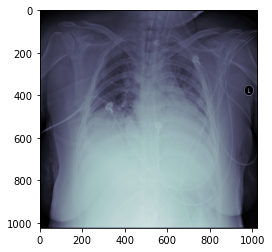

In [20]:
img_dcm = dcmread(f'{train_paths[1]}.dcm')
img_np = img_dcm.pixel_array
plt.imshow(img_np, cmap='bone')

Images without bounding boxes:

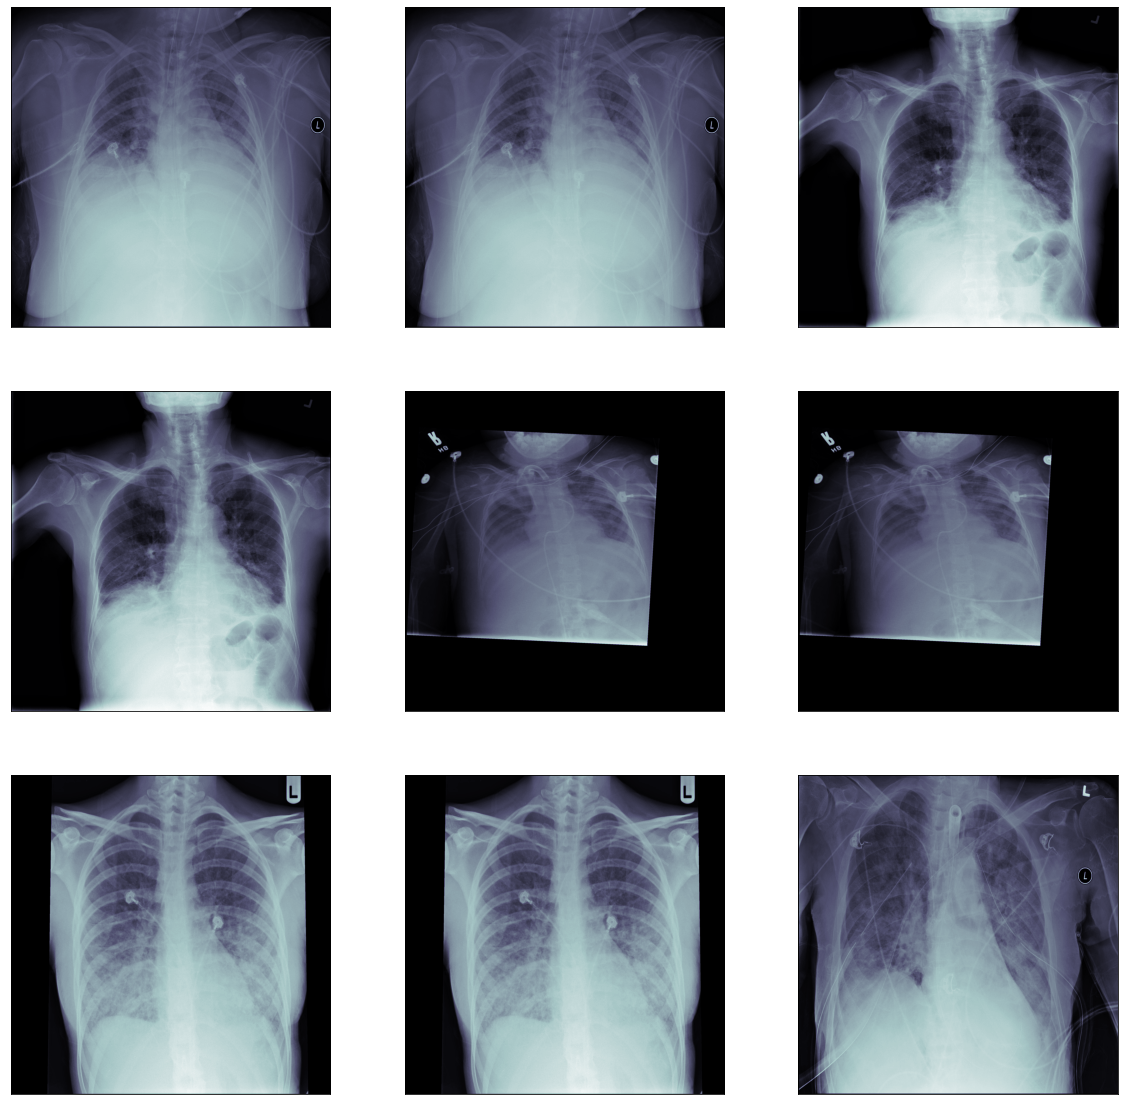

In [22]:
def view_images(n=9):
    
    plt.figure(figsize=(20,20))
    
    for i in range(n):
        plt.subplot(3, 3, i+1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        
        img_dcm = dcmread(f'{train_paths[i]}.dcm')
        img_np = img_dcm.pixel_array
        plt.imshow(img_np, cmap='bone')

view_images()

Images with bounding boxes:

In [30]:
for idx, i in enumerate(os.listdir(folder_path)):
    img=cv.read(i)
    plt.imshow(img,cmap='bone')
    current_axis = plt.gca()

for idx, i in enumerate(os.listdir(folder_path)):

    

    
    

SyntaxError: unexpected EOF while parsing (2393955405.py, line 1)

In [36]:
a_file = open(r"C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labels\val\2a9035ed-ec09-404d-adc3-d37688adf50a.txt", "r")
list_of_lists = []
for line in a_file:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    list_of_lists.append(line_list)
a_file.close()

In [40]:
list_of_lists

[['0', '0.3525390625', '0.48828125', '0.146484375', '0.205078125'],
 ['0', '0.70166015625', '0.5009765625', '0.1025390625', '0.201171875']]

In [53]:
float(list_of_lists[0][1])*1024/2


180.5

In [44]:
import cv2

In [67]:
for box in list_of_lists:
    print(box[1])
    print(box[2])

0.3525390625
0.48828125
0.70166015625
0.5009765625


In [131]:
src=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\yl_3000_3000_3200\labels'
lf=[]
for idx,fname in enumerate(os.listdir(src)):
    a=os.path.splitext(fname)[0]
    lf.append(a)

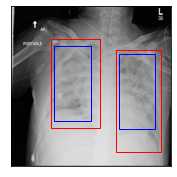

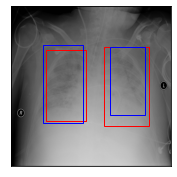

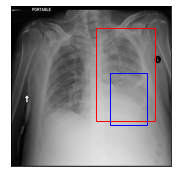

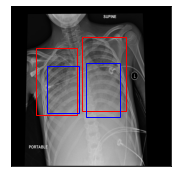

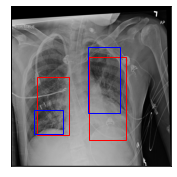

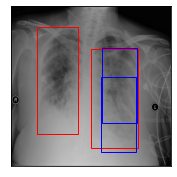

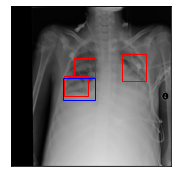

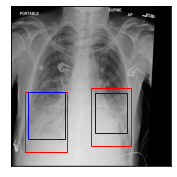

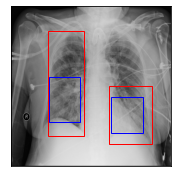

In [130]:

for idx, a in enumerate(lf[0:9]):
    plt.figure(figsize=(10,10))
    plt.subplot(3, 3, idx+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    label_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labels\Newfolder'
    images_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\Newfolder'
    label_path2=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\yl_3000_3000_3200\labels'
    ll=[]
    a_file = open(os.path.join(label_path,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll.append(line_list)
    a_file.close()
    ll2=[]
    a_file = open(os.path.join(label_path2,a+'.txt'))
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ll2.append(line_list)
    a_file.close()
    current_axis = plt.gca()
    img=cv2.imread(os.path.join(images_path,a+'.jpg'))
        #img=cv2.imread(r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\val\2a9035ed-ec09-404d-adc3-d37688adf50a.jpg')
    plt.imshow(img,cmap='bone')
    current_axis = plt.gca()
    for box in ll:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='red', fill=False, linewidth=1))
    current_axis = plt.gca()
    for box in ll2:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='blue', fill=False, linewidth=1))


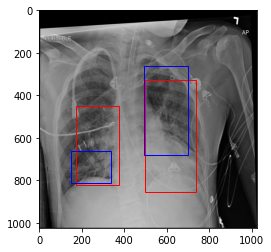

In [123]:
a=lf[4]
label_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labels\Newfolder'
images_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\Newfolder'
label_path2=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\runs\detect\exp10003\labels'
ll=[]
a_file = open(os.path.join(label_path,a+'.txt'))
for line in a_file:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    ll.append(line_list)
a_file.close()
ll2=[]
a_file = open(os.path.join(label_path2,a+'.txt'))
for line in a_file:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    ll2.append(line_list)
a_file.close()
current_axis = plt.gca()
img=cv2.imread(os.path.join(images_path,a+'.jpg'))
    #img=cv2.imread(r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\val\2a9035ed-ec09-404d-adc3-d37688adf50a.jpg')
plt.imshow(img,cmap='bone')
current_axis = plt.gca()
for box in ll:
    x=float(box[1])*1024-float(box[3])*1024/2
    y=float(box[2])*1024-float(box[4])*1024/2
    w=float(box[3])*1024
    h=float(box[4])*1024
    current_axis.add_patch(plt.Rectangle((x, y), w, h, color='red', fill=False, linewidth=1))
current_axis = plt.gca()
for box in ll2:
    x=float(box[1])*1024-float(box[3])*1024/2
    y=float(box[2])*1024-float(box[4])*1024/2
    w=float(box[3])*1024
    h=float(box[4])*1024
    current_axis.add_patch(plt.Rectangle((x, y), w, h, color='blue', fill=False, linewidth=1))


src=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labels\val'
label_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labels\val'
images_path=r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\val'

for idx,fname in enumerate(os.listdir(src)):
    #if idx<800: #and idx<1001:
    #l.append(os.path.join(src,fname))
    a=os.path.splitext(fname)[0]


    a_file = open(os.path.join(label_path,a+'.txt'))
    #a_file = open(r"C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\labels\val\2a9035ed-ec09-404d-adc3-d37688adf50a.txt", "r")
    list_of_lists= []
    for line in a_file:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        list_of_lists.append(line_list)
    a_file.close()
    current_axis = plt.gca()
    img=cv2.imread(os.path.join(images_path,a+'.jpg'))
    #img=cv2.imread(r'C:\Users\vikra\Downloads\yolov5-master-20220314T021606Z-001\yolov5-master\data1\images\val\2a9035ed-ec09-404d-adc3-d37688adf50a.jpg')
    plt.imshow(img,cmap='bone')
    current_axis = plt.gca()
    for box in list_of_lists:
        x=float(box[1])*1024-float(box[3])*1024/2
        y=float(box[2])*1024-float(box[4])*1024/2
        w=float(box[3])*1024
        h=float(box[4])*1024
        current_axis.add_patch(plt.Rectangle((x, y), w, h, color='red', fill=False, linewidth=3))



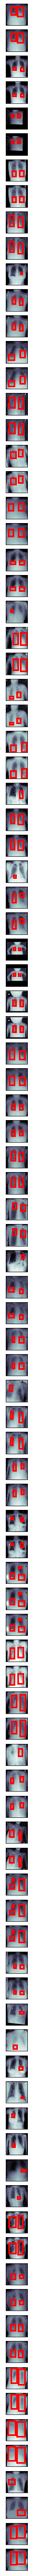

In [29]:
def image_with_bboxes(n=9):
    plt.figure(figsize=(20,20))
    
    for i in range(n):
        plt.subplot(3, 3, i+1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        
        id_= labels_pos['patientId'].values[i]

        current_axis = plt.gca()
        img=pyd.read_file(os.path.join(train_path,id_+'.dcm')).pixel_array
        plt.imshow(img,cmap='bone')


        current_axis = plt.gca()
        #boxes=labels_pos[['x','y','width','height']][labels_pos['patientId']==id_].values

        for box in list_of_lists:
            x=box[1]-box[3]/2
            y=box[2]-box[4]/2
            w=box[3]
            h=box[4]
            current_axis.add_patch(plt.Rectangle((x, y), w, h, color='red', fill=False, linewidth=3)) 
        
image_with_bboxes()

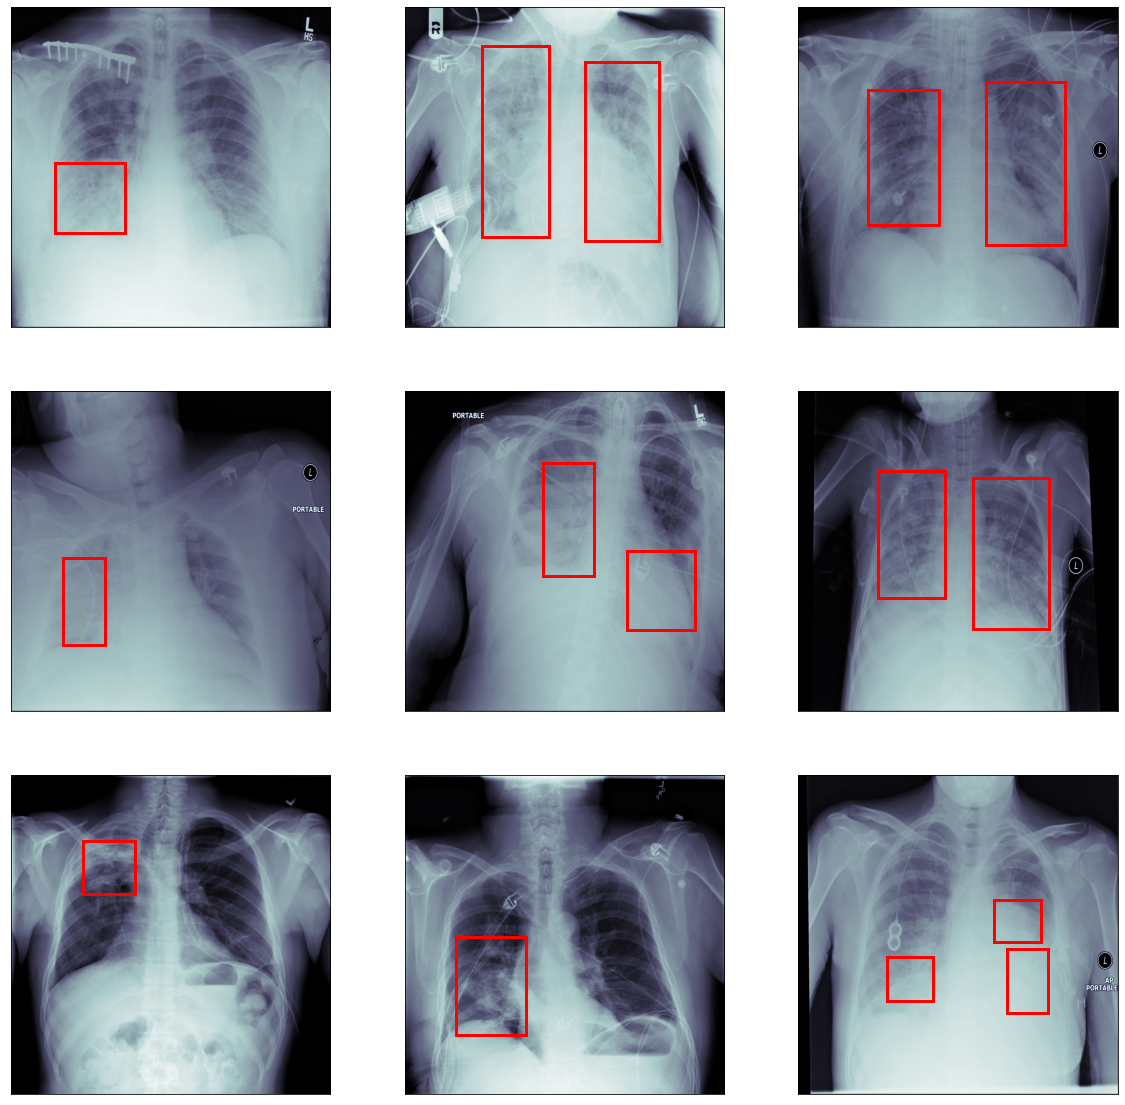

In [56]:
def image_with_bboxes(n=9):
    plt.figure(figsize=(20,20))
    
    for i in range(n):
        plt.subplot(3, 3, i+1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        
        id_= np.random.choice(labels_pos['patientId'].values)

        current_axis = plt.gca()
        img=pyd.read_file(os.path.join(train_path,id_+'.dcm')).pixel_array
        plt.imshow(img,cmap='bone')


        current_axis = plt.gca()
        boxes=labels_pos[['x','y','width','height']][labels_pos['patientId']==id_].values

        for box in boxes:
            x=box[0]
            y=box[1]
            w=box[2]
            h=box[3]
            current_axis.add_patch(plt.Rectangle((x, y), w, h, color='red', fill=False, linewidth=3)) 
        
image_with_bboxes()

In [27]:
from matplotlib.patches import Rectangle

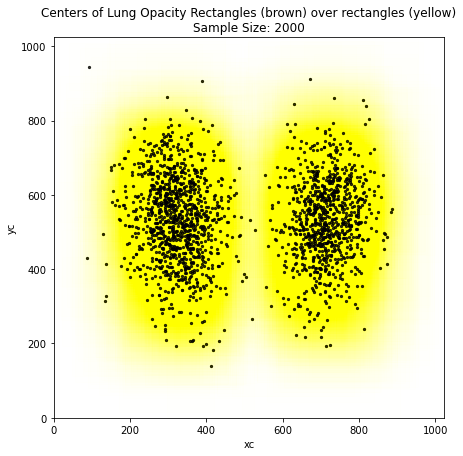

In [45]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))

labels_pos=labels[labels['Target']==1]
labels_sample =labels_pos.sample(2000)
#defining the centre of bounding boxes
#xc= x+ w/2
labels_sample['xc'] = labels_sample['x'] + labels_sample['width'] / 2
labels_sample['yc'] = labels_sample['y'] + labels_sample['height'] / 2
plt.title('Centers of Lung Opacity Rectangles (brown) over rectangles (yellow)\nSample Size: 2000')
target_sample.plot.scatter(x = 'xc', y = 'yc', xlim = (0, 1024), ylim = (0, 1024), ax = ax, alpha = 0.8, marker = '.', color = 'black')

for index, value in target_sample.iterrows():
    #print(value)
    ax.add_patch(Rectangle(xy=(value['x'], value['y']),
                width=value['width'],height=value['height'],alpha=3.5e-3, color="yellow"))

In [43]:
labels_sample

,patientId,x,y,width,height,Target,xc,yc
11800,79bb5ea3-ca6c-4d75-a379-a6ee6c6da659,337.0,464.0,146.0,80.0,1,410.0,504.0
13700,893b6861-0bfc-4e9f-94d4-3a967dda4223,662.0,237.0,223.0,309.0,1,773.5,391.5
18035,ab335009-3c56-4dc0-8280-77dee7889d5d,178.0,439.0,180.0,204.0,1,268.0,541.0
18817,b0780603-efa4-453c-a51c-a23c4efedfc1,236.0,358.0,226.0,227.0,1,349.0,471.5
26231,ea4e3c77-6956-4ba1-9c73-3bc93c1f0398,108.0,699.0,207.0,88.0,1,211.5,743.0
...,...,...,...,...,...,...,...,...
11656,78a396fd-20af-4384-acdd-c9a6ddb8c1ad,299.0,528.0,121.0,119.0,1,359.5,587.5
20637,bc6dd946-0b3f-445f-8d78-3cc39a0b14ae,615.0,341.0,223.0,228.0,1,726.5,455.0
4503,3f4eae54-fb2b-4616-a32f-c42f7df570b7,606.0,683.0,246.0,259.0,1,729.0,812.5
18567,aecf37ea-fe82-4618-bf8e-650d83f2ba42,208.0,592.0,153.0,121.0,1,284.5,652.5


In [54]:
dcm_data = dcmread(f'{train_paths[1]}.dcm')
print('Metadata of the image:', dcm_data)

Metadata of the image: Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.6379.1517874325.469569
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.6379.1517874325.469569
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0

In [56]:
unique_patientId

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...
30219,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,666.0,418.0,186.0,223.0,1
30221,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,609.0,464.0,240.0,284.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0


In [58]:
len(train_paths)

9555

In [88]:
labels_pos

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1
14,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1
...,...,...,...,...,...,...
30220,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,316.0,504.0,179.0,273.0,1
30221,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,609.0,464.0,240.0,284.0,1
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


In [71]:
l=train_paths

In [84]:
#df=pd.DataFrame((l,predl),columns=['path','label'])
df=pd.DataFrame(np.column_stack([train_paths,l,l,l,l,l,l,l,l,l,l]), 
                               columns=['path','PatientID','Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']
)

In [86]:
for i in range(len(train_paths)):
    #data_img = dcmread(f'{train_paths[i]}.dcm')
    df.PatientID[i] = dcmread(f'{train_paths[i]}.dcm').PatientID
    df['Modality'][i] = dcmread(f'{train_paths[i]}.dcm').Modality
    df['PatientAge'][i] = pd.to_numeric(dcmread(f'{train_paths[i]}.dcm').PatientAge)
    df['PatientSex'][i] = dcmread(f'{train_paths[i]}.dcm').PatientSex
    df['BodyPartExamined'][i] = dcmread(f'{train_paths[i]}.dcm').BodyPartExamined
    df['ViewPosition'][i] = dcmread(f'{train_paths[i]}.dcm').ViewPosition
    df['ConversionType'][i] = dcmread(f'{train_paths[i]}.dcm').ConversionType
    df['Rows'][i] = dcmread(f'{train_paths[i]}.dcm').Rows
    df['Columns'][i] = dcmread(f'{train_paths[i]}.dcm').Columns
    df['PixelSpacing'][i] = str.format("{:4.3f}", dcmread(f'{train_paths[i]}.dcm').PixelSpacing[0])

In [87]:
df

,path,PatientID,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing
0,C:\Users\vikra\OneDrive\Documents\AI Notes\cap...,00436515-870c-4b36-a041-de91049b9ab4,CR,32,F,CHEST,AP,WSD,1024,1024,0.139
1,C:\Users\vikra\OneDrive\Documents\AI Notes\cap...,00436515-870c-4b36-a041-de91049b9ab4,CR,32,F,CHEST,AP,WSD,1024,1024,0.139
2,C:\Users\vikra\OneDrive\Documents\AI Notes\cap...,00704310-78a8-4b38-8475-49f4573b2dbb,CR,75,M,CHEST,PA,WSD,1024,1024,0.143
3,C:\Users\vikra\OneDrive\Documents\AI Notes\cap...,00704310-78a8-4b38-8475-49f4573b2dbb,CR,75,M,CHEST,PA,WSD,1024,1024,0.143
4,C:\Users\vikra\OneDrive\Documents\AI Notes\cap...,00aecb01-a116-45a2-956c-08d2fa55433f,CR,6,F,CHEST,AP,WSD,1024,1024,0.168
...,...,...,...,...,...,...,...,...,...,...,...
9550,C:\Users\vikra\OneDrive\Documents\AI Notes\cap...,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,CR,47,F,CHEST,AP,WSD,1024,1024,0.168
9551,C:\Users\vikra\OneDrive\Documents\AI Notes\cap...,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,CR,54,M,CHEST,AP,WSD,1024,1024,0.139
9552,C:\Users\vikra\OneDrive\Documents\AI Notes\cap...,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,CR,54,M,CHEST,AP,WSD,1024,1024,0.139
9553,C:\Users\vikra\OneDrive\Documents\AI Notes\cap...,c1f7889a-9ea9-4acb-b64c-b737c929599a,CR,72,F,CHEST,AP,WSD,1024,1024,0.139


In [94]:
for i in ['Modality',  'PatientSex','BodyPartExamined', 'ViewPosition', 'ConversionType']:
    print(df[i].value_counts())

CR    9555
Name: Modality, dtype: int64
M    5560
F    3995
Name: PatientSex, dtype: int64
CHEST    9555
Name: BodyPartExamined, dtype: int64
AP    7788
PA    1767
Name: ViewPosition, dtype: int64
WSD    9555
Name: ConversionType, dtype: int64


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vikra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PatientSex', ylabel='count'>

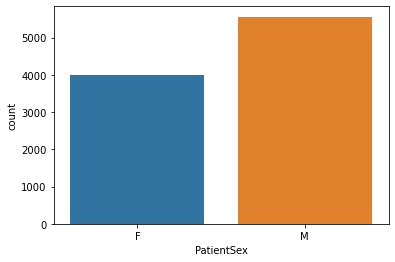

In [102]:
sns.countplot(df['PatientSex'], data = df)

In [ ]:
dcm_data = dcmread(f'{train_paths[1]}.dcm')
print('Metadata of the image:', dcm_data)

In [4]:
def process_dicom_data(data_df):
    for n, pid in enumerate(data_df['patientId'].unique()):        
        dcm_file = r'C:\Users\vikra\OneDrive\Documents\AI Notes\capstone\stage_2_train\%s.dcm' % pid
        #dcm_data = pydicom.read_file(dcm_file)  
        dcm_data = dcmread(f'{train_paths[1]}.dcm')
        idx = (data_df['patientId']==dcm_data.PatientID)
        data_df.loc[idx,'Modality'] = dcm_data.Modality
        data_df.loc[idx,'PatientAge'] = pd.to_numeric(dcm_data.PatientAge)
        data_df.loc[idx,'PatientSex'] = dcm_data.PatientSex
        data_df.loc[idx,'BodyPartExamined'] = dcm_data.BodyPartExamined
        data_df.loc[idx,'ViewPosition'] = dcm_data.ViewPosition
        
    return data_df

In [7]:
df = pd.concat([labels,detailed_class["class"]],axis=1,sort=False)
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [8]:
df

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1,Lung Opacity


In [ ]:
df.fillna(0)

In [11]:
dicom_df = process_dicom_data(df)
dicom_df

NameError: name 'pydicom' is not defined